In [1]:
import xarray as xr
import now
from dask.distributed import LocalCluster, Client

## Starting a Local Cluster with dask.distributed
Here we will define a local cluster on the NCI Virtual Desktop and choose to use multithreading on the 8 cores available. Multithreading is achieved by setting `processes` to `False`. Since dask workers may write exceeding bits of data that not fit in the memory to the drive, we set the `local_dir` to the /g/data1/e14. More information about how to set a Local Cluster with dask is given [here](http://docs.dask.org/en/latest/setup/single-distributed.html). 

In [2]:
local_dir = "/g/data1/e14/gs9353/dask-workers/"
cluster = LocalCluster(processes=False, local_dir=local_dir)

Creating a scheduler linked to the previous cluster can be done creating an instance of the `Client` object. Calling `Client()` also create an associated dask taskboard, which is accessible via an IP address.

In [3]:
client = Client(cluster)
client

Client Scheduler: inproc://10.0.64.23/9910/1 Dashboard: http://localhost:8787/status,Cluster Workers: 1 Cores: 8 Memory: 33.67 GB


## Choosing a configuration file

In [4]:
cfg = '/g/data1/e14/gs9353/CONFIG/present_vs_future.ini'

## Opening a zarr dataset from the configuration file
Opening the grids U, V and T for the zarr datasets are very straight forward. Path are read from the configuration file. A Zarr folder almost loads instantly a `xarray.Dataset` contrary to a group of netCDF files. A new dimension has been created associated to the different simulations. All the NOW data are now accessible using in a single representation.

In [5]:
gridU = now.io.open_nemo_griddata_from_zarr(cfg, grid='U')
gridV = now.io.open_nemo_griddata_from_zarr(cfg, grid='V')
gridT = now.io.open_nemo_griddata_from_zarr(cfg, grid='T')
gridT

<xarray.Dataset>
Dimensions:          (simulation: 2, time_counter: 6940, x: 431, y: 289)
Coordinates:
    nav_lat          (y, x) float32 dask.array<shape=(289, 431), chunksize=(289, 431)>
    nav_lon          (y, x) float32 dask.array<shape=(289, 431), chunksize=(289, 431)>
  * time_counter     (time_counter) datetime64[ns] 1990-01-01T12:00:00 ... 2008-12-31T12:00:00
    time_maximum_1d  (time_counter) datetime64[ns] dask.array<shape=(6940,), chunksize=(6940,)>
    time_minimum_1d  (time_counter) datetime64[ns] dask.array<shape=(6940,), chunksize=(6940,)>
  * simulation       (simulation) <U7 'Present' 'Future'
Dimensions without coordinates: x, y
Data variables:
    20d              (simulation, time_counter, y, x) float32 dask.array<shape=(2, 6940, 289, 431), chunksize=(1, 500, 289, 431)>
    blt              (simulation, time_counter, y, x) float32 dask.array<shape=(2, 6940, 289, 431), chunksize=(1, 500, 289, 431)>
    depti            (simulation, time_counter, y, x) float32 dask

Let's compute the mean seasonal cycle of the Mixed Layer Depth over the Dataset for the two simulation. 

In [6]:
mld_seasonal_cycle_lazy = gridT['mld_dt02'].groupby('time_counter.dayofyear').mean('time_counter')
mld_seasonal_cycle_lazy

<xarray.DataArray 'mld_dt02' (simulation: 2, dayofyear: 366, y: 289, x: 431)>
dask.array<shape=(2, 366, 289, 431), dtype=float32, chunksize=(1, 1, 289, 431)>
Coordinates:
    nav_lat     (y, x) float32 dask.array<shape=(289, 431), chunksize=(289, 431)>
    nav_lon     (y, x) float32 dask.array<shape=(289, 431), chunksize=(289, 431)>
  * simulation  (simulation) <U7 'Present' 'Future'
  * dayofyear   (dayofyear) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Dimensions without coordinates: y, x

Note that the computation has not been launched yet since `xarray` and `dask` use a lazy evaluation of most of `numpy` operations. Distributing the computation on the cluster is then achieved using the command `compute()`.

In [7]:
mld_seasonal_cycle = mld_seasonal_cycle_lazy.compute()

In [8]:
mld_seasonal_cycle

<xarray.DataArray 'mld_dt02' (simulation: 2, dayofyear: 366, y: 289, x: 431)>
array([[[[   0.     , ..., 5300.185  ],
         ...,
         [ 825.07214, ..., 5621.157  ]],

        ...,

        [[   0.     , ..., 5300.185  ],
         ...,
         [ 825.07214, ..., 5621.1567 ]]],


       [[[   0.     , ..., 5300.185  ],
         ...,
         [ 825.07214, ..., 5621.157  ]],

        ...,

        [[   0.     , ..., 5300.185  ],
         ...,
         [ 825.07214, ..., 5621.1567 ]]]], dtype=float32)
Coordinates:
    nav_lat     (y, x) float32 -43.27347 -43.37204 ... 14.78277 14.848713
    nav_lon     (y, x) float32 82.76912 83.00413 ... -175.2138 -175.04564
  * simulation  (simulation) <U7 'Present' 'Future'
  * dayofyear   (dayofyear) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Dimensions without coordinates: y, x

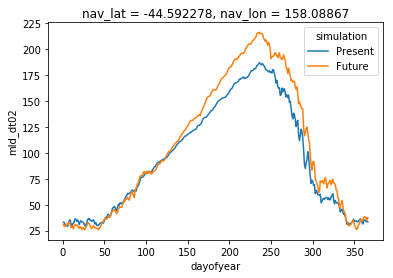

distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/8 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/9 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/10 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/11 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/12 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/13 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://10.0.64.23/9910/14 remote=inproc://10.0.64.23/9910/1>
distributed.comm.inproc - WAR

In [8]:
mld_seasonal_cycle.isel(y=50, x=250).plot.line(x='dayofyear')

In [11]:
max_mld = mld_seasonal_cycle.max('dayofyear')
mld_difference = max_mld.sel(simulation="Future") - max_mld.sel(simulation="Present")

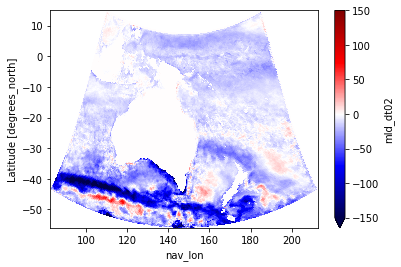

In [13]:
mld_difference['nav_lon'] = mld_difference['nav_lon'] % 360
mld_difference.plot(x='nav_lon', y='nav_lat', cmap='seismic', vmin=-150, vmax=150)

In [ ]:
#cosima cookbook
3